In [468]:
import numpy as np
import csv
import matplotlib.pyplot as plt
# from utils.plotDecBoundaries import plotDecBoundaries
import random as rm
import sys
from sklearn.preprocessing import normalize

In [469]:
def getData(fname, dimension):
    # create a new array to store the data
    data = np.empty([0,dimension])
    label = []
    with open(fname, mode ='r')as file:
        # reading the CSV file
        csvFile = csv.reader(file)
        
        # displaying the contents of the CSV file
        for lines in csvFile: 
            data = np.row_stack((data,[float(lines[0]), float(lines[1])]))
            label.append(float(lines[2]))
    label = np.array(label)
    return (data, label)

In [470]:
################################################
## EE559 HW1, Prof. Jenkins
## Created by Arindam Jati
## Tested in Python 3.6.3, OSX El Capitan, and subsequent versions
################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def plotDecBoundaries(training, label_train, w):
    # Plot the decision boundaries and data points for perceptron learning classification result
    # training: traning data
    # label_train: class lables correspond to training data
    # w: weight vector
    nclass = max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.01

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1] + inc / 100, inc),
                         np.arange(yrange[0], yrange[1] + inc / 100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack((x.reshape(x.shape[0] * x.shape[1], 1, order='F'),
                    y.reshape(y.shape[0] * y.shape[1], 1, order='F')))  # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    aug = np.zeros(np.shape(xy)[0]) + 1
    xy_aug = np.concatenate((aug[:, None], xy), axis=1)
    pred_label = np.zeros(np.shape(xy)[0])
    
    for i in range(np.shape(xy)[0]):
        if w.T @ xy_aug[i] > 0:
            pred_label[i] = 1
        else:
            pred_label[i] = 2

    decisionmap = pred_label.reshape(image_size, order='F')

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0], training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0], training[label_train == 2, 1], 'go')

    l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    plt.show()

In [471]:
def shuffle(data, label):
    newData = np.copy(data)
    newLabel = np.copy(label)
    N = len(newData)
    shuff = np.random.permutation(N)
    for i in range(N):
        newData[i] = data[shuff[i]]
        newLabel[i] = label[shuff[i]]
#     print(newData)
    return (newData, newLabel)

In [629]:
def perceptronLearning(data, label, w0, eta = 1, maxIter = 10000, var = False):
    """
    data: (N, D + 1) data array, non-augmented format with labels(1.0, 2.0)
    eta: learning rate (constant)
    maxEpochs: max number of passes through the data.  Halts sooner if no classififcation errors
    """
    
    N, D = data.shape
    z = (-1.0) ** (label + 1)
    wHat = np.copy(w0)
    dataAug = np.ones((N, D + 1))
    dataAug[:, 1:] = data
    zData = (dataAug.T * z).T
#     print(zData)
    wHats = np.zeros((maxIter + 1, D + 1))
    
    JsIter = []
    JsEpoch = []
    misIter = []
    misEpoch = []
#     error_rates = np.zeros(maxIter + 1)
    
    minJ = sys.float_info.max
    finalWHat = np.copy(w0)
    i1 = False
    
    
    for m in range(1, int(maxIter / N) +):
        if(var):
            shuffledData, shuffledLabel = shuffle(data,label)
            z = (-1.0) ** (shuffledLabel + 1)
            dataAug[:, 1:] = shuffledData
            zData = (dataAug.T * z).T            
        J_iter = 0
        correctClass = 0
        for n in range(1, N + 1):
            condition = np.dot(wHat ,zData[n - 1])
            index = (m - 1) * N + n - 1
            
            # compute new J(w) and misclassfication
            J_iter = 0
            correctClass = 0
            for i in range(0, N):
                gx = np.dot(wHat ,zData[i])
                if gx <= 0:
                    J_iter -= gx
                else:
                    correctClass += 1     
            JsIter.append(J_iter)
            misIter.append((N - correctClass) / N * 100)        
            
            if( J_iter < minJ ):
                minJ = J_iter
                finalWHat = np.copy(wHat)
            
            if(condition <= 0):
                wHats[index] = np.copy(wHat)
                wHat = wHat + eta * zData[n - 1]
            else:
                wHats[index] = np.copy(wHat)
        
        JsEpoch.append(J_iter)
        misEpoch.append((N - correctClass) / N * 100)
        
        if correctClass == N:
            print("i1 reach. Data is linearly separable")
            print("Weight matrix is:" , wHat)
            print("Min J is:" , J_iter)
            i1 = True
            
            if(m < 10):
                plt.plot(np.arange(len(JsIter)), JsIter)
                plt.plot(np.arange(len(misIter)), misIter)
                plt.xlabel("iteration")
#                 plt.ylabel("J loss")
                plt.legend(('Js', 'misclassification'), loc=2)
                plt.show()
            else:
                plt.plot(np.arange(len(JsEpoch)), JsEpoch)
                plt.plot(np.arange(len(misEpoch)), misEpoch)
                plt.xlabel("Epoch")
                plt.legend(('Js', 'misclassification'), loc=2)
#                 plt.ylabel("J loss")
            break
#             print(J, wHat, correctClass)
        
    if(not i1):
        print("i2 reach")
        print("Weight matrix is:" , finalWHat)
        print("Min J is:" , minJ)
        plt.plot(np.arange(len(JsEpoch)), JsEpoch)
        plt.plot(np.arange(len(misEpoch)), misEpoch)
        plt.xlabel("Epoch")
#         plt.ylabel("J loss")
        plt.legend(('Js', 'misclassification'), loc=2)
        plt.show()
#     print(misclassification)

    return finalWHat

i1 reach. Data is linearly separable
Weight matrix is: [ 0.1        -1.83903524  2.18732364]
Min J is: 0


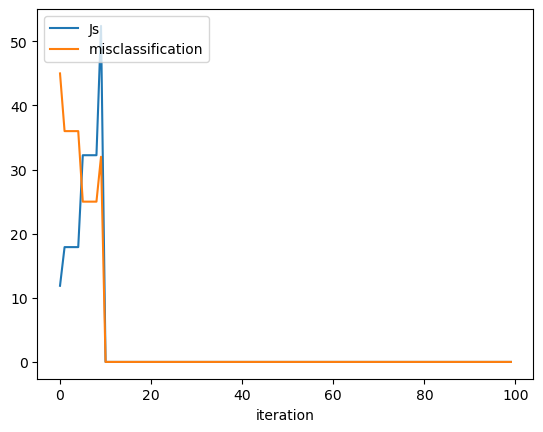

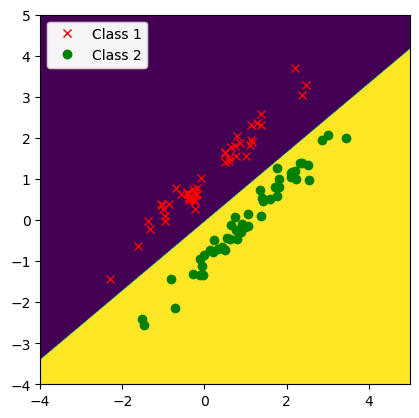

In [7]:
w0 = 0.1 * np.array([1, 1, 1])
dataTrain1, labelTrain1 = getData("dataset1_train.csv", 2)
newDataTrain1, newLabelTrain1 = shuffle(dataTrain1, labelTrain1)
wHat1 = perceptronLearning(newDataTrain1, newLabelTrain1, w0, eta = 1)
plotDecBoundaries(newDataTrain1,newLabelTrain1,wHat1)

In [721]:
def test(data, label, wHat):
    '''
    data: data is a matrix with dimension: num of data points * num features
    '''
    N, D = data.shape
    z = (-1.0) ** (label + 1)
    wHat = np.copy(wHat)
    dataAug = np.ones((N, D + 1))
    dataAug[:, 1:] = data
    zData = (dataAug.T * z).T

    count = 0
    for i in range(N):
        if np.dot(wHat ,zData[i]) > 0:
            count += 1
    print("Error rate: ", (N - count) / N * 100 , "%")


In [722]:
test(dataTrain1,labelTrain1,WHat1)

Error rate:  0.0 %


In [723]:
dataTest1, labelTest1 = getData("dataset1_test.csv", 2)
test(newDataTest1, newLabelTest1, finalWHat)

Error rate:  0.0 %


i1 reach. Data is linearly separable
Weight matrix is: [-0.9        -0.22588065  3.09050735]
Min J is: 0


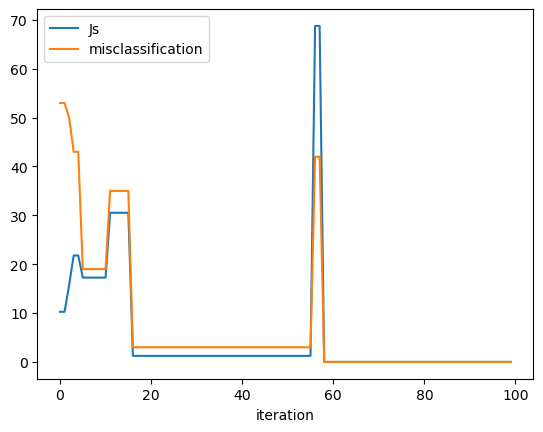

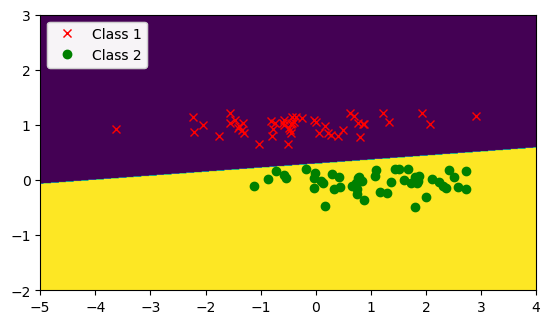

In [635]:
dataTrain2, labelTrain2 = getData("dataset2_train.csv", 2)
newDataTrain2, newLabelTrain2 = shuffle(dataTrain2, labelTrain2)
wHat2 = perceptronLearning(newDataTrain2, newLabelTrain2, w0, eta = 1)
plotDecBoundaries(newDataTrain2,newLabelTrain2,wHat2 )

In [729]:
test(newDataTrain2,newLabelTrain2,wHat2)

Error rate:  0.0 %


In [730]:
dataTest2, labelTest2 = getData("dataset2_test.csv", 2)
test(dataTest2, labelTest2, wHat2)

Error rate:  2.0 %


i2 reach
Weight matrix is: [ 0.1        -0.14944965 -0.11672786]
Min J is: 5.643994017248471


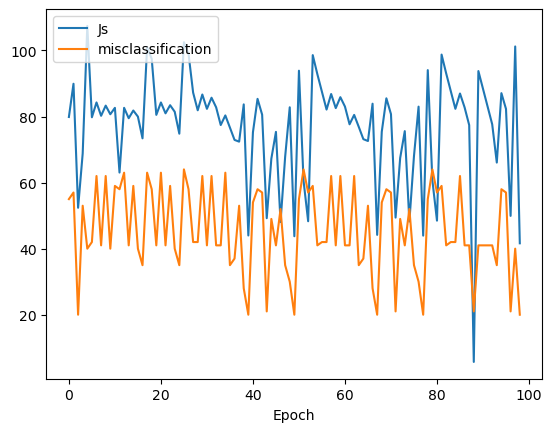

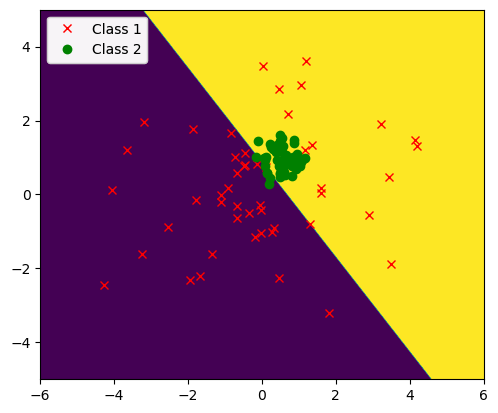

In [638]:
dataTrain3, labelTrain3 = getData("dataset3_train.csv", 2)
wHat3 = perceptronLearning(newDataTrain3, newLabelTrain3, w0, eta = 1)
plotDecBoundaries(newDataTrain3,newLabelTrain3,wHat3)

In [724]:
test(newDataTrain3,newLabelTrain3,wHat3)

Error rate:  23.0 %


In [725]:
dataTest3, labelTest3 = getData("dataset3_test.csv", 2)
test(dataTest3, labelTest3, wHat3)

Error rate:  25.0 %


i1 reach. Data is linearly separable
Weight matrix is: [ 0.1        -6.25390868  6.68619887]
Min J is: 0


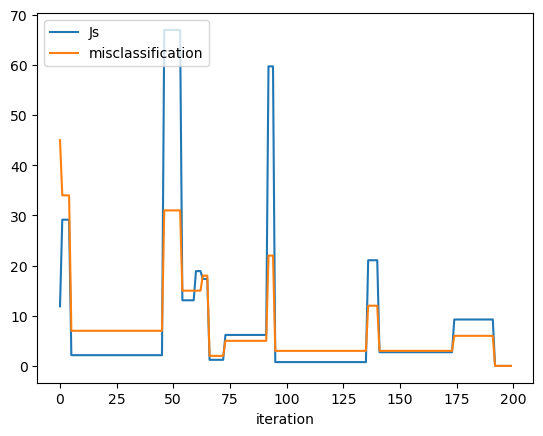

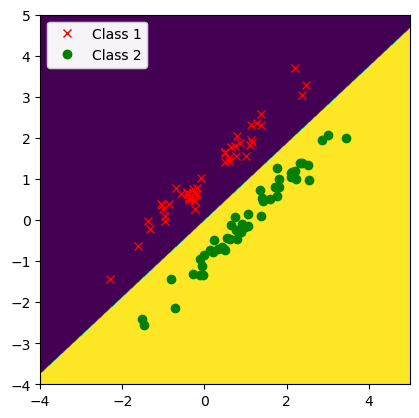

In [726]:
wVar1 = perceptronLearning(dataTrain1, labelTrain1, w0, eta = 1,  var = True)
plotDecBoundaries(dataTrain1,labelTrain1,wVar1)

In [727]:
test(dataTrain1,labelTrain1,wVar1)

Error rate:  0.0 %


In [728]:
test(dataTest1,labelTest1,wVar1)

Error rate:  0.0 %


i1 reach. Data is linearly separable
Weight matrix is: [-1.9        -0.24078341  3.06009372]
Min J is: 0


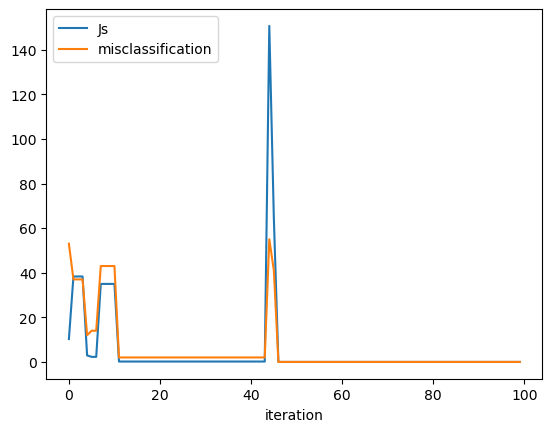

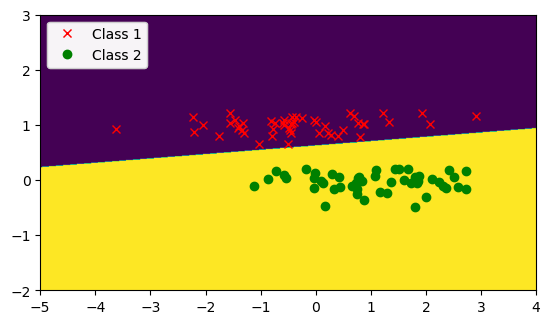

In [644]:
wVar2 = perceptronLearning(dataTrain2, labelTrain2, w0, eta = 1, var = True)
plotDecBoundaries(dataTrain2,labelTrain2,wVar2)

In [731]:
test(dataTrain2,labelTrain2,wVar2)

Error rate:  0.0 %


In [732]:
test(dataTest2,labelTest2,wVar2)

Error rate:  3.0 %


i2 reach
Weight matrix is: [ 0.1        -0.00202323 -0.06969695]
Min J is: 2.395592804014518


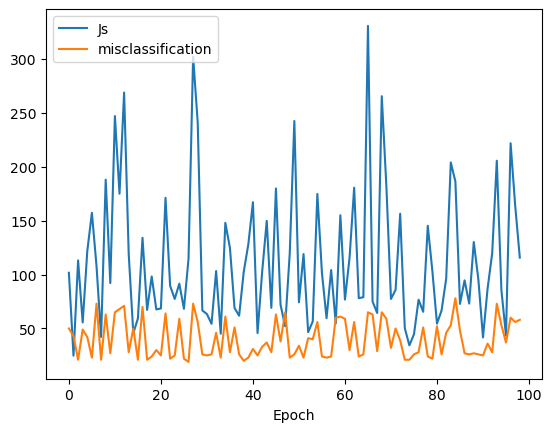

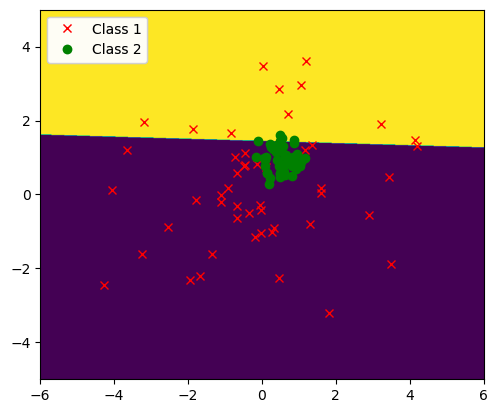

In [647]:
wVar3 = perceptronLearning(dataTrain3, labelTrain3, w0, eta = 1, var = True)
plotDecBoundaries(dataTrain3,labelTrain3,wVar3)

In [733]:
test(dataTrain3,labelTrain3,wVar2)

Error rate:  65.0 %


In [734]:
test(dataTest3,labelTest3,wVar2)

Error rate:  68.0 %


Train on the BC data

In [658]:
data_train = np.load('breast_cancer_train.npy')
train_bc_data = np.array(data_train[:,1:])
train_bc_label = np.array(data_train[:,0])

data_test = np.load('breast_cancer_test.npy')
test_bc_data = np.array(data_test[:,1:])
test_bc_label = np.array(data_test[:,0])

train_L1_norms = np.linalg.norm(train_bc_data, ord=1, axis=0)
train_normalized = train_bc_data / train_L1_norms * 100
test_normalized = test_bc_data / train_L1_norms * 100

In [659]:
wbc = [0.1 * 1 for _ in range(len(train_bc_data[0]) + 1)]

In [660]:
train_bc_data_shuffled, train_bc_label_shuffled = shuffle(train_normalized,train_bc_label)

i2 reach
Weight matrix is: [-9.9         0.5017636   6.49740265  0.62713144  3.19182841 -2.10446458
 -1.14895794  6.11455833  6.04760966  0.0299059  -3.09329639  2.29076901
 -0.11159452 -0.33217937  5.84373329  0.36845115 -3.53841119 -3.54586243
 -0.96518394  2.30119468 -3.70253296  2.14138555  8.19515425  1.90574421
  6.16414975  1.04743463  2.3097488   3.49591765  4.74253323  3.86528191
 -0.24946351]
Min J is: 3.4741884847744737


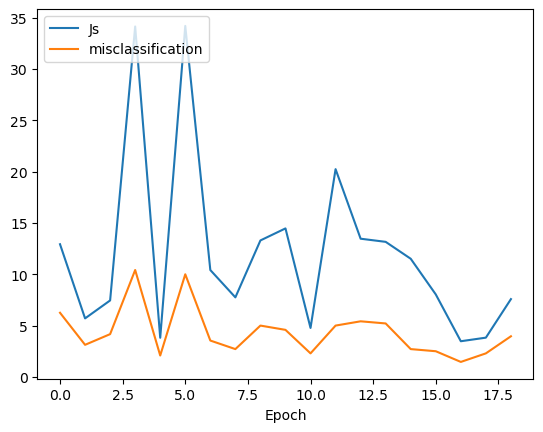

In [661]:
wBC = perceptronLearning(train_bc_data_shuffled, train_bc_label_shuffled, wbc, eta = 1, var = False)

In [735]:
test(train_normalized,train_bc_label,wBC)

Error rate:  1.4583333333333333 %


In [736]:
test(test_normalized,test_bc_label,wBC)

Error rate:  4.49438202247191 %


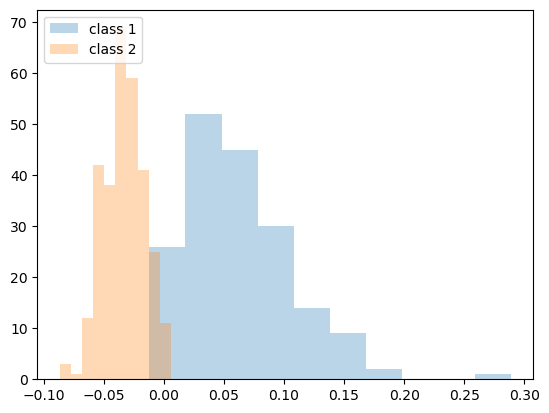

In [717]:
plotHist(train_normalized,train_bc_label,wBC)

i2 reach
Weight matrix is: [-9.9         0.34538201  5.85956462  0.46216348  3.04439382 -2.2735228
 -2.02382794  5.25627691  3.36506732 -0.16216568 -2.96547847  1.58327834
 -0.57130751  0.27344041  5.72551543  0.27151865 -3.26369525 -3.09442752
 -3.0815444   2.56545637 -4.04956398  2.471221    8.11519134  2.46610604
  7.08892095  1.49724016  2.78612184  5.54279396  5.24020285  4.7215487
  0.46984436]
Min J is: 2.7210562544169994


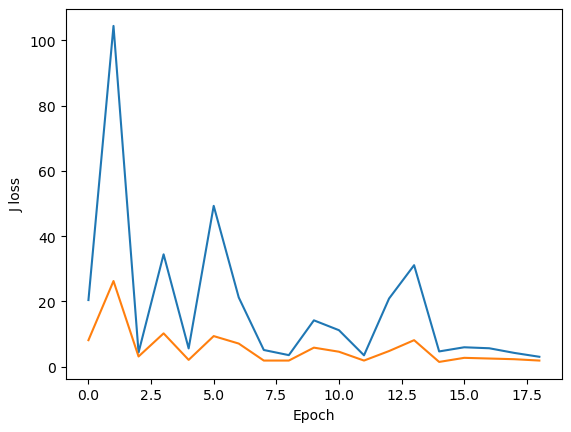

In [499]:
wBC_var = perceptronLearning(train_normalized, train_bc_label_shuffled, wbc, eta = 1, maxEpochs = 10000, var = True)

In [737]:
test(train_normalized,train_bc_label,wBC_var)

Error rate:  1.6666666666666667 %


In [738]:
test(test_normalized,test_bc_label,wBC_var)

Error rate:  3.3707865168539324 %


In [709]:
def plotHist(data,label,w):
    N , D = data.shape
    w_norm = np.linalg.norm(wBC, ord=1, axis=0)
    z = (-1.0) ** (label + 1)
    dataAug = np.ones((N, D + 1))
    dataAug[:, 1:] = data
    zData = (dataAug.T * z).T
    
    class1 = []
    class2 = []
    for i in range(N):
        if(label[i] == 1.):
            class1.append(np.dot(w,zData[i]) / w_norm)
        else:
            class2.append(-np.dot(w,zData[i]) / w_norm)
    plt.hist(class1,alpha = 0.3)
    plt.hist(class2,alpha = 0.3)
    plt.legend(('class 1', 'class 2'), loc=2)


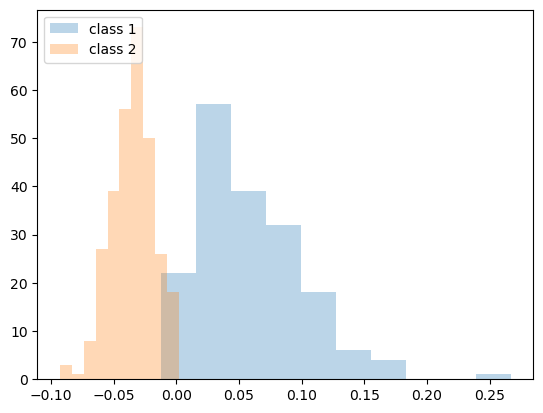

In [720]:
plotHist(train_normalized,train_bc_label,wBC_var)

In [711]:
def sigma(x):
    v = np.abs(x)
    sigma_v = np.exp(-v) / (1.0 + np.exp(-v))
    signs = np.sign(x)
    return (signs < 0) + signs * sigma_v 
#     return signs * sigma_v

In [712]:
def softmax(x):
    return -1. * np.log(sigma(x))

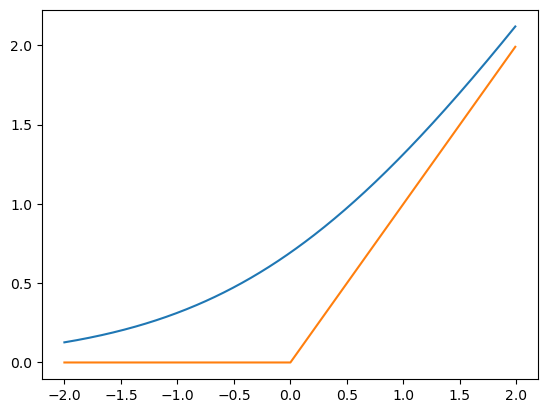

In [713]:
def plotSoftmax():
    x = np.arange(-2.,2.,0.01)
    plt.plot(x,softmax(x))
    y = []
    for i in x:
        if(i < 0):
            y.append(0)
        else:
            y.append(i)
            
    plt.plot(x,y)
plotSoftmax()

In [714]:
def gdSoftmax(zData, wHat):
    ans = sigma(-np.dot(wHat, zData)) * zData
    return ans

In [752]:
def logisticRegressionLearning(data, label, w0, eta = 1, maxEpochs = 10000, var = False):
    """
    data: (N, D + 1) data array, non-augmented format with labels(1.0, 2.0)
    eta: learning rate (constant)
    maxEpochs: max number of passes through the data.  Halts sooner if no classififcation errors
    """
    
    N, D = data.shape
    z = (-1.0) ** (label + 1)
    wHat = np.copy(w0)
    dataAug = np.ones((N, D + 1))
    dataAug[:, 1:] = data
    zData = (dataAug.T * z).T
#     print(zData)
    wHats = np.zeros((maxEpochs + 1, D + 1))
    
    JsIter = []
    JsEpoch = []
    misIter = []
    misEpoch = []
#     error_rates = np.zeros(maxEpochs + 1)
    
    minJ = sys.float_info.max
    finalWHat = np.copy(w0)
    i1 = False
    
    
    for m in range(1, int(maxEpochs / N)):
        if(var):
            shuffledData, shuffledLabel = shuffle(data,label)
            z = (-1.0) ** (shuffledLabel + 1)
            dataAug[:, 1:] = shuffledData
            zData = (dataAug.T * z).T            
        J_iter = 0
        correctClass = 0
        for n in range(1, N + 1):
            condition = np.dot(wHat ,zData[n - 1])
            index = (m - 1) * N + n - 1
            
            # compute new J(w) and misclassfication
            J_iter = 0
            correctClass = 0
            for i in range(0, N):
                gx = np.dot(wHat ,zData[i])
                if gx <= 0:
                    J_iter += softmax(gx)
                else:
                    correctClass += 1     
            JsIter.append(J_iter)
            misIter.append((N - correctClass) / N * 100)        
            
            if( J_iter < minJ ):
                minJ = J_iter
                finalWHat = np.copy(wHat)
            
#             wHats[index] = np.copy(wHat)
#             wHat = wHat + eta * gdSoftmax(zData[n - 1], wHat)
            if(condition <= 0):
                wHats[index] = np.copy(wHat)
                wHat = wHat + eta * gdSoftmax(zData[n - 1], wHat)
            else:
                wHats[index] = np.copy(wHat)
        
        JsEpoch.append(J_iter)
        misEpoch.append((N - correctClass) / N * 100)
        
        if correctClass == N:
            print("i1 reach. Data is linearly separable")
            print("Weight matrix is:" , wHat)
            print("Min J is:" , J_iter)
            i1 = True
            
            if(m < 10):
                plt.plot(np.arange(len(JsIter)), JsIter)
                plt.plot(np.arange(len(misIter)), misIter)
                plt.xlabel("iteration")
                plt.legend(('Js', 'misclassification'), loc=2)
                plt.show()
            else:
                plt.plot(np.arange(len(JsEpoch)), JsEpoch)
                plt.plot(np.arange(len(misEpoch)), misEpoch)
                
                plt.xlabel("Epoch")
                plt.legend(('Js', 'misclassification'), loc=2)
                plt.show()
            break
#             print(J, wHat, correctClass)
        
    if(not i1):
        print("i2 reach")
        print("Weight matrix is:" , finalWHat)
        print("Min J is:" , minJ)
        plt.plot(np.arange(len(JsEpoch)), JsEpoch)
        plt.plot(np.arange(len(misEpoch)), misEpoch)
        plt.xlabel("Epoch")
        plt.legend(('Js', 'misclassification'), loc=2)
        plt.show()
#     print(misclassification)

    return finalWHat

i2 reach
Weight matrix is: [-10.23434489   0.40360165   6.49344559   0.52599664   3.05415421
  -2.172346    -1.1638993    5.99377854   5.89871147   0.03638436
  -3.12607942   2.03257688  -0.44541542  -0.67006477   5.64161758
   0.14892003  -3.20418973  -3.56874944  -1.19027039   2.37559059
  -3.50258556   2.11994398   8.30089006   1.86583569   6.19116042
   1.1053723    2.84370102   3.80146479   4.8881845    4.20184781
  -0.01394843]
Min J is: 2.0739478716431825


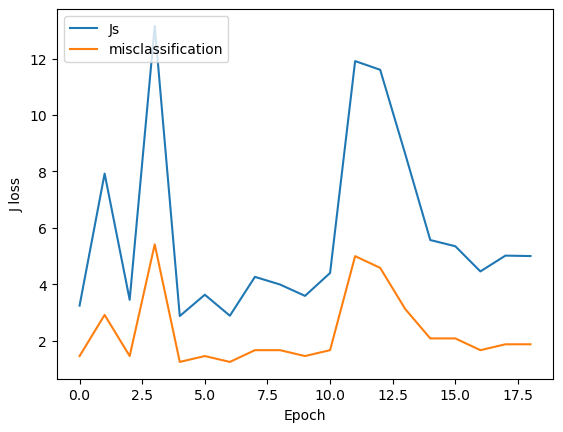

In [744]:
wLog = logisticRegressionLearning(train_bc_data_shuffled,train_bc_label_shuffled,wBC)

In [746]:
test(train_normalized,train_bc_label,wLog)

Error rate:  1.0416666666666665 %


In [747]:
test(test_normalized,test_bc_label,wLog)

Error rate:  3.3707865168539324 %


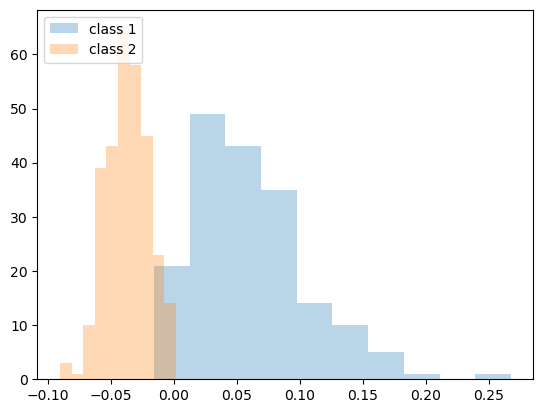

In [748]:
plotHist(train_normalized,train_bc_label,wLog)

i2 reach
Weight matrix is: [-10.02345692   0.35188315   6.63721107   0.46105787   2.95586491
  -2.20427504  -1.72317507   5.64261971   5.21481623   0.23376044
  -3.18676316   2.00343102  -0.58377632  -0.59289793   5.81247235
   0.28742529  -3.19955481  -3.27488414  -1.41328204   2.3167574
  -3.7074916    2.20742895   8.64000369   1.97033964   6.40868743
   1.2968597    2.63911008   4.01138392   4.93147716   4.45201502
   0.01783195]
Min J is: 2.253363585563639


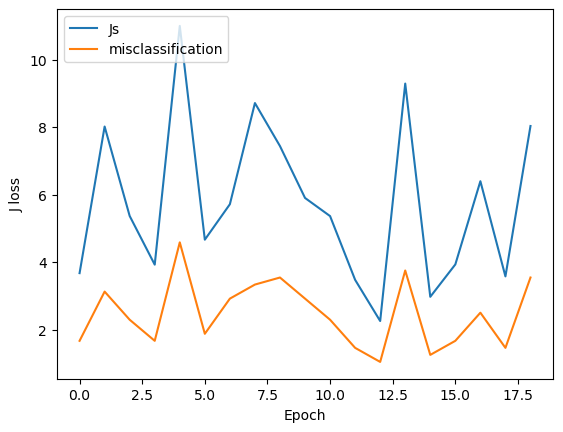

In [749]:
wLogVar = logisticRegressionLearning(train_normalized,train_bc_label,wBC,var = True)

In [750]:
test(train_normalized,train_bc_label,wLogVar)

Error rate:  1.0416666666666665 %


In [751]:
test(test_normalized,test_bc_label,wLogVar)

Error rate:  3.3707865168539324 %


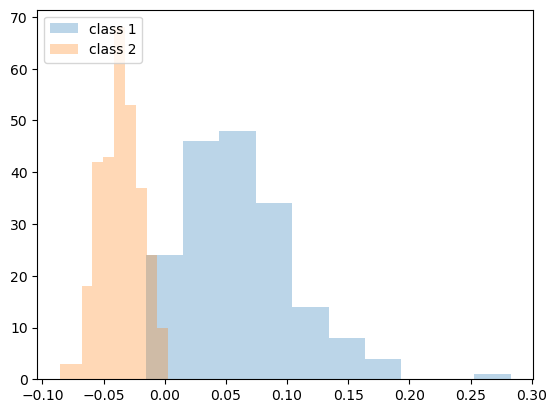

In [716]:
plotHist(train_normalized,train_bc_label,wLogVar)